## Efficiently Combining, Counting, and Iterating

In [1]:
# combining objects 
names = ['Ahmed', 'Youssef', 'Mohammed']
age = [25, 27, 40]
combined = []

for i,name in enumerate(names):
    combined.append((name, age[i]))
print(combined)

[('Ahmed', 25), ('Youssef', 27), ('Mohammed', 40)]


In [2]:
# Combining objects with zip
combined_zip = zip(names, age)
print(type(combined_zip))

<class 'zip'>


In [3]:
combined_zip_list=[*combined_zip]

In [4]:
combined_zip_list

[('Ahmed', 25), ('Youssef', 27), ('Mohammed', 40)]

## Counting Objects

In [5]:
from collections import Counter
poke_types=['A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B','C',
           'C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','D','D','D','D','D','D','D','D','D','D',
           'D','D','D','D','D','D','D','D','D','D','D','D','D','D','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E']
type_counts=Counter(poke_types)

In [6]:
type_counts

Counter({'D': 24, 'C': 21, 'A': 17, 'E': 15, 'B': 11})

## itertools

Another built-in module, itertools, contains functional tools for working with iterators. A subset of these tools is:

- Infinite iterators: count, cycle, repeat
- Finite iterators: accumulate, chain, zip_longest, etc.
- Combination generators: product, permutations, combinations

### Combinations:
To avoid pairs that are of same word or pairs same combination but different pair order.

In [7]:
poke_types = ['Bug', 'Fire', 'Ghost', 'Grass', 'Water']
from itertools import combinations
combos_obj=combinations(poke_types,2)
combos=[*combos_obj]
combos

[('Bug', 'Fire'),
 ('Bug', 'Ghost'),
 ('Bug', 'Grass'),
 ('Bug', 'Water'),
 ('Fire', 'Ghost'),
 ('Fire', 'Grass'),
 ('Fire', 'Water'),
 ('Ghost', 'Grass'),
 ('Ghost', 'Water'),
 ('Grass', 'Water')]

## Introduction to the set theory:

- intersection() : all elements that are in both sets
- difference(): all elements in one set but not the other
- symmetric_difference(): all elements in exactly one set
- union(): all elements that are in either set

Suppose we had two lists of Pokémon names: list_a and list_b and we would like to compare these lists to see which Pokémon appear in both lists. We could first use a nested for loop to compare each item in list_a to each item in list_b and collect only those items that appear in both lists. But, iterating over each item in both lists is extremely inefficient.

In [13]:
list_a = ['Bulbasaur', 'Charmander', 'Squirtle']
list_b = ['Caterpie', 'Pidgey', 'Squirtle']
set_a=set(list_a)
set_b=set(list_b)
%timeit in_common = set_a.intersection(set_b)
print(set_a.intersection(set_b))

160 ns ± 2.18 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
{'Squirtle'}


In [14]:
%timeit set_a.union(set_b)
print(set_a.union(set_b))

214 ns ± 0.762 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
{'Charmander', 'Pidgey', 'Squirtle', 'Bulbasaur', 'Caterpie'}


The union function takes more time then the intersection function

In [15]:
%timeit set_a.difference(set_b)
set_a.difference(set_b) ## here we remove thw word Squirtle from set_a

170 ns ± 14.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


{'Bulbasaur', 'Charmander'}

In [16]:
set_a.symmetric_difference(set_b) ## all the words from both sets except its intersection (Squirtle)

{'Bulbasaur', 'Caterpie', 'Charmander', 'Pidgey'}

Another nice efficiency gain when using sets is the ability to quickly check if a specific item is a member of a set's elements. Consider our collection of 720 Pokémon names stored as a list, tuple, and set.

When comparing lists, tuples, and sets in terms of performance for finding elements, there are key differences based on their underlying data structures and intended uses:

### 1. **Tuples**
- **Implementation:** Tuples are immutable sequences. This means once created, their contents cannot be changed.
- **Element Lookup:** Finding an element in a tuple requires a linear search (O(n) time complexity), where `n` is the number of elements in the tuple.

### 2. **Lists**
- **Implementation:** Lists are mutable sequences, allowing modification of their contents.
- **Element Lookup:** Similar to tuples, finding an element in a list also requires a linear search (O(n) time complexity).

### 3. **Sets**
- **Implementation:** Sets are unordered collections of unique elements, and they use a hash table (or similar data structure) to store elements.
- **Element Lookup:** Finding an element in a set is much faster compared to lists and tuples. The average time complexity for lookups in a set is O(1) due to the hash table, though it can degrade to O(n) in the worst case (e.g., hash collisions).

### Summary
- **Speed of Lookup:** Sets are generally the fastest for finding elements due to their hash-based implementation. Both lists and tuples require linear searches, so finding an element in these structures can be slower, especially as the number of elements increases.
- **Use Case:** Choose a set when you need fast membership testing and do not require ordered elements. Choose a list or tuple when you need ordered collections, or when you need the immutability provided by tuples.

In [20]:
poke_types=['A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B','C',
           'C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','D','D','D','D','D','D','D','D','D','D',
           'D','D','D','D','D','D','D','D','D','D','D','D','D','D','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E']
names_list = list(poke_types)
names_set = set(poke_types)
names_tuple = tuple(poke_types)

In [22]:
%timeit 'A' in names_list # 41.9 ns 
%timeit 'A' in names_tuple # 40.8 ns 
%timeit 'A' in names_set # 41.7 ns

41.9 ns ± 0.122 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
40.8 ns ± 0.0816 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
41.7 ns ± 0.117 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Eliminating Loops:
- For loops iterate over elements of a sequence piece-by-piece. 
- While loops execute a loop repeatedly as long as some Boolean condition is met. 
- Nested loops use multiple loops inside one another.

One of the idioms of pythonic code is that "flat is better than nested." Striving to eliminate loops in our code will help us follow this idiom. 

- Inefficient way

In [29]:
import time

poke_stats = [
    [90, 92, 75, 60],
    [25, 20, 15, 90],
    [65, 130, 60, 75],
]

# Record the start time
start_time = time.time()

totals = []
for row in poke_stats:
    totals.append(sum(row))

# Record the end time
end_time = time.time()

# Print the total time taken
print(f"Time taken: {end_time - start_time} seconds")


Time taken: 0.00013375282287597656 seconds


Using comprehension List

In [27]:
%timeit totals_comp = [sum(row) for row in poke_stats]

702 ns ± 9.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


The second way is faster than the first way

Using map function

In [30]:
%timeit totals_map = [*map(sum, poke_stats)]

576 ns ± 8.38 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Each of these approaches will return the same list, but using a list comprehension or the map function takes one line of code, and has a faster runtime.

#### Eliminate loops with NumPy

But, NumPy arrays allow us to perform calculations on entire arrays all at once. Here, we use the dot-mean method and specify an axis equal to 1 to calculate the mean for each row (meaning we calculate an average across the column values). This eliminates the need for a loop and is much more efficient.

In 2D array:

- Axis 0: This means performing operations column-wise.
- Axis 1: this means performing operations row-wise. 

In 3D array:

- Axis 0: Refers to operations along the first dimension (depth). z
- Axis 1: Refers to operations along the second dimension (rows). x
- Axis 2: Refers to operations along the third dimension (columns). y

In [31]:
import numpy as np

array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

array.sum(axis=0)

array([12, 15, 18])

In [32]:
array.sum(axis=1)

array([ 6, 15, 24])

In [33]:
array.mean(axis=0)

array([4., 5., 6.])

#### Writing better loops:

The best way to make a loop more efficient is to analyze what's being done within the loop. We want to make sure that we aren't doing unnecessary work in each iteration. If a calculation is performed for each iteration of a loop, but its value doesn't change with each iteration, it's best to move this calculation outside (or above) the loop. If a loop is converting data types with each iteration, it's possible that this conversion can be done outside (or below) the loop using a map function. Anything that can be done once should be moved outside of a loop. Let's explore a few examples.

Unnecessary code should be placed outside the loop in order to not take more execution time.

#### Using holistic conversions

Another way to make loops more efficient is to use holistic conversions outside (or below) the loop. In the example below we have three lists from the 720 Pokémon dataset: a list of each Pokémon's name, a list corresponding to whether or not a Pokémon has a legendary status, and a list of each Pokémon's generation. We want to combine these objects so that each name, status, and generation is stored in an individual list. To do this, we'll use a loop that iterates over the output of the zip function. Remember, zip returns a collection of tuples, so we need to convert each tuple into a list since we want to create a list of lists as our output. Then, we append each individual poke_list to our poke_data output variable. By printing the result, we see our desired list of lists.

In [34]:
names_list = ['Pikachu', 'Bulbasaur', 'Charizard', 'Mewtwo', 'Eevee']

# Sample data for legendary status (1 for legendary, 0 for non-legendary)
legend_status_list = [0, 0, 0, 1, 0]  # Mewtwo is legendary

# Sample data for generations
generations_list = [1, 1, 1, 1, 1]  # All these Pokémon are from Generation 1


In [35]:
%%timeit -r1 -n1
poke_data = []
for poke_tuple in zip(names_list, legend_status_list, generations_list):
    poke_list = list(poke_tuple)
    poke_data.append(poke_list)

11.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


However, converting each tuple to a list within the loop is not very efficient. Instead, we should collect all of our poke_tuples together, and use the map function to convert each tuple to a list. The loop no longer converts tuples to lists with each iteration. Instead, we moved this tuple to list conversion outside (or below) the loop. That way, we convert data types all at once (or holistically) rather than converting in each iteration.

In [36]:
%%timeit -r1 -n1
poke_data_tuples = []
for poke_tuple in zip(names_list, legend_status_list, generations_list):
    poke_data_tuples.append(poke_tuple)
    poke_data = [*map(list, poke_data_tuples)]

16.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 2. Pandas Optimization

### Iterating with .iterrows() 

pandas come with a few efficient methods for looping over a DataFrame. The first method we'll cover is the .iterrows method. This is similar to the .iloc method, but .iterrows returns each DataFrame row as a tuple of (index, pandas Series) pairs. This means each object returned from .iterrows contains the index of each row as the first element and the data in each row as a pandas Series as the second element.

Notice that we still create the empty win_perc_list, but now we don't have to create an index variable to look up each row within the DataFrame. .iterrows handles the indexing for us! 

In [ ]:
## more efficient
%%timeit
win_perc_list = []
for i,row in baseball_df.iterrows():
    wins = row['W']
    games_played = row['G']

    win_perc = calc_win_perc(wins, games_played)
    win_perc_list.append(win_perc)

baseball_df['WP'] = win_perc_list

#### Iterating with .itertuples()

If we use .iterrows to loop over our team_wins_df DataFrame and print each row's tuple, we see that each row's values are stored as a pandas Series. Remember, .iterrows returns each DataFrame row as a tuple of (index, pandas Series) pairs, so we have to access the row's values with square bracket indexing.

But, we could use .itertuples to loop over our DataFrame rows instead. The .itertuples method returns each DataFrame row as a special data type called a namedtuple. A namedtuple is one of the specialized data types that exist within the collections module we've discussed previously. These data types behave just like a Python tuple but have fields accessible using attribute lookup.



In [ ]:
team_wins_df = baseball_df[['Team','Year','W']]
for row_namedtuple in team_wins_df.itertuples():
    print(row_namedtuple)
    print(row_namedtuple.Index)
    print(row_namedtuple.Team)

The reason .itertuples is more efficient than .iterrows is due to the way each method stores its output. Since .iterrows returns each row's values as a pandas Series, there is a bit more overhead.

### Pandas Alternative to Looping

In order to write efficient code, we want to avoid looping as much as possible. Therefore now we will explore an alternative to using .iterrows and .itertuples to perform calculations on a DataFrame.

In [ ]:
def calc_run_diff(runs_scored, runs_allowed):
    run_diff = runs_scored - runs_allowed
    return run_diff

%%timeit
run_diffs_iterrows = []

for i,row in baseball_df.iterrows():
    run_diff = calc_run_diff(row['RS'], row['RA'])
    run_diffs_iterrows.append(run_diff)

baseball_df['RD'] = run_diffs_iterrows


#### Pandas.apply() Method

One alternative to using a loop to iterate over a DataFrame is to use pandas.apply method. This function acts like the map function. It takes a function as an input and applies this function to an entire DataFrame.  

In [ ]:
%%timeit
run_diffs_apply = baseball_df.apply(
    lambda row: calc_run_diff(row['RS'], row['RA']),
    axis=1)

baseball_df['RD'] = run_diffs_apply

#### Optimal Pandas Iterating
The beauty of knowing that pandas are built on NumPy can be seen when taking advantage of a NumPy array's broadcasting abilities.

In [ ]:
%%timeit

run_diffs_np = baseball_df['RS'].values - baseball_df['RA'].values
baseball_df['RD'] = run_diffs_np

#### Stop Looping Through Pandas DataFrames

##### Looping effectively using .iterrows()
Generators are a simple tool to create iterators. Inside the body of a generator, instead of return statements, you will find only yield() statements. There can be just one, or several yield() statements. Here, we can see a generator, city_name_generator(), that produces four city names. We assign the generator to the variable city_names for simplicity.

In [39]:
def city_name_generator():
  yield('New York')
  yield('London')
  yield('Tokyo')
  yield('Sao Paolo')

city_names = city_name_generator()

In [42]:
next(city_names)

'New York'

In [43]:
next(city_names)

'London'

In [44]:
next(city_names)

'Tokyo'

One smarter way to iterate through a pandas DataFrame is to use the .iterrows() function, which is optimized for this task. We simply define the ‘for’ loop with two iterators, one for the number of each row and the other for all the values

In [ ]:
data_generator = poker_data.iterrows()
start_time = time.time()
for index, values in data_generator:
  next
print("Time using .iterrows(): {} sec".format(time.time() - start_time))


#### Looping Effectively Using .apply()
Now we will use the .apply() function to be able to perform a specific task while iterating through a pandas DataFrame. The .apply() function does exactly what it says; it applies another function to the whole DataFrame.

apply() vs. iterrows()

In [ ]:
data_sqrt = poker_data.apply(lambda x: np.sqrt(x), axis =0 )
data_sqrt.head()

In [ ]:
apply_start_time = time.time()
poker_data[['R1', 'R2', 'R3', 'R4', 'R5']].apply(lambda x: sum(x), axis=1)
apply_end_time = time.time()
apply_time = apply_end_time - apply_start_time
print("Time using .apply(): {} sec".format(apply_time))

In [ ]:
for_loop_start_time = time.time()
for ind, value in poker_data.iterrows():
  sum([value[1], value[3], value[5], value[7], value[9]])
for_loop_end_time = time.time()

for_loop_time = for_loop_end_time - for_loop_start_time
print("Time using .iterrows(): {} sec".format(for_loop_time))

Using the .apply() function is significantly faster than the .iterrows() function, with a magnitude of around 400 percent, which is a massive improvement!

apply() vs. pandas built in function

In [ ]:
apply_start_time = time.time()
poker_data[['R1', 'R2', 'R3', 'R4', 'R5']].apply(lambda x: sum(x), axis=0)
apply_end_time = time.time()
apply_time = apply_end_time - apply_start_time
print("Time using .apply(): {} sec".format(apply_time))

In [ ]:
pandas_start_time = time.time()
poker_data[['R1', 'R1', 'R3', 'R4', 'R5']].sum(axis=0)
pandas_end_time = time.time()
pandas_time = pandas_end_time - pandas_start_time
print("Time using pandas: {} sec".format(pandas_time))

#### Looping effectively using vectorization

In [45]:
import numpy as np
import time

# Initialize an array
n = 1000000
array = np.random.rand(n)

# Vectorized operation: compute the square of each element
start_time = time.time()
squared = array ** 2
end_time = time.time()

print(f"Vectorized time: {end_time - start_time} seconds")

Vectorized time: 0.004617929458618164 seconds


### 
#### How To Use .groupby() Effectively As A Data Scient

##### Common functions used with .groupby()
One of the simplest methods to apply to an aggregated group is the .count(). In the example below we will apply this to the restaurant dataset. At first, we group the restaurant data according to whether the customer was a smoker or not. Then, we apply the .count() method. We obtain the count of smokers and non-smokers.

In [47]:
import pandas as pd
baby_names = pd.read_csv('popular_Baby_Names.csv')

baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       11345 non-null  int64 
 1   Gender              11345 non-null  object
 2   Ethnicity           11345 non-null  object
 3   Child's First Name  11345 non-null  object
 4   Count               11345 non-null  int64 
 5   Rank                11345 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 531.9+ KB


In [50]:
baby_names_grouped=baby_names.groupby('Gender')
print(baby_names_grouped.count())

        Year of Birth  Ethnicity  Child's First Name  Count  Rank
Gender                                                           
FEMALE           5756       5756                5756   5756  5756
MALE             5539       5539                5539   5539  5539
female             50         50                  50     50    50


Apply the z-score transformation a normalization transformation, which is the distance between each value and the mean, divided by the standard deviation. 

In [ ]:
z_score= lambda x:(x-x.mean())/x.std()
baby_names_count=baby_names.groupby('Year of Birth')


In [72]:
gender_count=baby_names.groupby('Gender')['Count'].count()
gender_count

Gender
FEMALE    5756
MALE      5539
female      50
Name: Count, dtype: int64

In [73]:
male_count.loc['MALE']

5539

In [74]:
male_count.loc['FEMALE']

5756

### 3. Missing value imputation using .groupby() & .transform()


In [75]:
baby_names.isna().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

There are no null values in the dataframe

if we have null values in Count and we need to fill it with mean than we can use transform

In [ ]:
fill_na_count = lambda x: x.fillna(x.mean())
baby_names_count=baby_names.groupby('Gender')['Count']
baby_names_count.transform(fill_na_count)

In [ ]:
baby_names.loc[baby_names.Gender == 'MALE']['Count'].mean()

#### 4. Data filtration using the .groupby() & .filter()

filter(): only a subset of those groups, based on some specific conditions.

In [76]:
baby_names.head(5)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5


In [77]:
baby_names['Ethnicity'].unique()

array(['ASIAN AND PACIFIC ISLANDER', 'BLACK NON HISPANIC', 'HISPANIC',
       'WHITE NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP'], dtype=object)

In [81]:
baby_names_gender=baby_names.groupby('Gender')
filter_transform = lambda x: x['Count'].mean()>20
baby_names_gender.filter(filter_transform)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
...,...,...,...,...,...,...
11340,2016,FEMALE,BLACK NON HISPANIC,Saniyah,10,43
11341,2016,FEMALE,BLACK NON HISPANIC,Skye,10,43
11342,2016,FEMALE,BLACK NON HISPANIC,Tiana,10,43
11343,2016,FEMALE,BLACK NON HISPANIC,Violet,10,43


#### 5. Writing Efficient python code

- Use generator to return list:

Generators are a type of iterable in Python that allow you to iterate over a sequence of values without storing the entire sequence in memory at once. They are defined using functions and the yield keyword, which allows the function to return a value and pause its state, resuming when the next value is requested. This makes generators an efficient way to handle large data sets or streams of data.

**Why using Generators:**

- Memory Efficient: Generators produce items one at a time and only when required, which means they don’t need to store the entire sequence in memory. This is especially useful for large datasets. Performance: Since generators yield items on the fly, they can provide a performance boost by avoiding the overhead of creating and storing large data structures.
- Lazy Evaluation: Generators compute values as needed, which can lead to more efficient and responsive programs.
- Simpler Code: Generators can simplify the code needed to create iterators, making it easier to read and maintain.


In [83]:
def get_squares(n):
    squares=[]
    for i in range(n):
        squares.append(i*i)
    return squares

get_squares(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Use generator instead:

In [85]:
def get_squares(n):
    for i in range(n):
        yield i*i

generator_squares=get_squares(10)

In [87]:
list(generator_squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

- Using generators to return lists in Python provides significant advantages in terms of **memory efficiency, performance, and lazy evaluation**. By generating values on the fly, you can handle **large datasets** more effectively and write cleaner, more maintainable code.

**kwargs** in Python

- **kwargs**: allows you to pass a variable number of keyword arguments to a function. 
- This feature is useful when you want to handle named arguments that you may not know ahead of time or want to provide default values for some arguments while still allowing flexibility.

In [90]:
def greet(**kwargs):
    for key,value in kwargs.items():
        print(f'key: {key}, value: {value}')

greet(name='Nancy',familyname='Bou Kamel',Job='Data Scientist')

key: name, value: Nancy
key: familyname, value: Bou Kamel
key: Job, value: Data Scientist


### Selecting & Replacing Values In Pandas Effectively

- Selecting Rows & Columns Efficiently using .iloc[] & .loc[]

In [92]:
import time

rows = range(0, 500)
# Time selecting rows using .loc[]
loc_start_time = time.time()
baby_names.loc[rows]
loc_end_time = time.time()
print("Time using .loc[] : {} sec".format(loc_end_time - loc_start_time))

Time using .loc[] : 0.007197856903076172 sec


In [94]:
baby_names.loc[1]

Year of Birth                               2011
Gender                                    FEMALE
Ethnicity             ASIAN AND PACIFIC ISLANDER
Child's First Name                         CHLOE
Count                                        106
Rank                                           2
Name: 1, dtype: object

In [96]:
baby_names.iloc[1]

Year of Birth                               2011
Gender                                    FEMALE
Ethnicity             ASIAN AND PACIFIC ISLANDER
Child's First Name                         CHLOE
Count                                        106
Rank                                           2
Name: 1, dtype: object

In [98]:
# Specify the range of rows to select
rows = range(0, 500)
# Time selecting rows using .iloc[]
iloc_start_time = time.time()
baby_names.iloc[rows]
iloc_end_time = time.time()
print("Time using .iloc[]: {} sec".format(iloc_end_time - iloc_start_time))

Time using .iloc[]: 0.0011758804321289062 sec


- iloc[] is 70% fatser than loc[]
- The .iloc[] function takes advantage of the order of the indices, which are already sorted, and is therefore faster.

- Replacing values in Dataframe effectively:

Important step in data cleaning

In [100]:
baby_names['Gender'].unique()

array(['FEMALE', 'female', 'MALE'], dtype=object)

In [104]:
# Assuming 'names' is your DataFrame
start_time = time.time()
baby_name_copy=baby_names.copy()
baby_name_copy['Gender'].loc[baby_name_copy['Gender']=='female']='FEMALE'
end_time = time.time()

pandas_time = end_time - start_time
print("Replace values using .loc[]: {} sec".format(pandas_time))

Replace values using .loc[]: 0.010368108749389648 sec


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_85517/4227535251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_name_copy['Gender'].loc[baby_name_copy['Gender']=='female']='FEMALE'


In [103]:
baby_name_copy['Gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [105]:
# Assuming 'names' is your DataFrame
start_time = time.time()
baby_name_copy=baby_names.copy()
baby_name_copy['Gender'].replace('female','FEMALE',inplace=True)
end_time = time.time()

pandas_time = end_time - start_time
print("Replace values using .loc[]: {} sec".format(pandas_time))


Replace values using .loc[]: 0.004869222640991211 sec


- replace is faster than loc[]
- What about Ethnicity?

In [106]:
baby_names['Ethnicity'].unique()

array(['ASIAN AND PACIFIC ISLANDER', 'BLACK NON HISPANIC', 'HISPANIC',
       'WHITE NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP'], dtype=object)

- we can replace WHITE NON HISPANIC and WHITE NON HISP by WNH and compare the run time

In [107]:
start_time = time.time()
baby_names_copy=baby_names.copy()
baby_names_copy.loc[(baby_names_copy['Ethnicity']=='WHITE NON HISPANIC') | (baby_names_copy['Ethnicity']=='WHITE NON HISP')]='WNH'
end_time = time.time()
pandas_time= end_time - start_time
print("Results from the above operation calculated in %s seconds" %(pandas_time))

Results from the above operation calculated in 0.020170927047729492 seconds


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_85517/3466309810.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'WNH' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  baby_names_copy.loc[(baby_names_copy['Ethnicity']=='WHITE NON HISPANIC') | (baby_names_copy['Ethnicity']=='WHITE NON HISP')]='WNH'


In [108]:
start_time = time.time()
baby_names['Ethnicity'].replace(['WHITE NON HISPANIC','WHITE NON HISP'],'WHN',inplace=True)
end_time = time.time()
replace_time = end_time - start_time

print("Time using .replace(): {} sec".format(replace_time))

Time using .replace(): 0.00763702392578125 sec


- Replace is more faster than loc[]
-  If your data is huge and need a lot of cleaning this tip will decrease the computational time of your data cleaning and makes your pandas code much faster and hence more efficient.
-  Use dictionaries to replace single and multiple values in your dataframe. Useful if you need multiple replace functions in one command. 

In [109]:
start_time = time.time()
baby_names_copy=baby_names.copy()
baby_names_copy['Gender'].replace({'MALE':'BOY','FEMALE':'GIRL','female':'girl'},inplace=True)
end_time = time.time()
dict_time = end_time - start_time
print("Time using .replace() with dictionary: {} sec".format(dict_time))

Time using .replace() with dictionary: 0.012640953063964844 sec


In [110]:
start_time = time.time()
baby_names_copy=baby_names.copy()
baby_name_copy['Gender'].replace('MALE','BOY',inplace=True)
baby_name_copy['Gender'].replace('FEMALE','GIRL',inplace=True)
baby_name_copy['Gender'].replace('female','girl',inplace=True)
end_time = time.time()
dict_time = end_time - start_time
print("Time using .replace() with dictionary: {} sec".format(dict_time))

Time using .replace() with dictionary: 0.014242887496948242 sec


- Dictionary is much faster than replace for multiple values. 

In [112]:
start_time = time.time()
baby_names.replace({'Ethnicity': {'ASIAN AND PACI': 'ASIAN', 'ASIAN AND PACIFIC ISLANDER': 'ASIAN',
'BLACK NON HISPANIC': 'BLACK', 'BLACK NON HISP': 'BLACK',
'WHITE NON HISPANIC': 'WHITE', 'WHITE NON HISP': 'WHITE'}})
print("Time using .replace() with dictionary: {} sec".format (time.time() - start_time))

Time using .replace() with dictionary: 0.012551069259643555 sec


### Summary best practices for selecting and replacing values:
- Selecting rows and columns is faster using the .iloc[] function. So it is better to use unless it is easier or more convenient to use .loc[] and the speed is not a priority or you are just doing it once.
- Using the built-in replace() function is much faster than just using conventional methods.
- Replacing multiple values using python dictionaries is faster than using lists.

## Make pandas code 1000 times faster


In [195]:
import pandas as pd
import numpy as np
def get_data(size= 10000):
    df = pd.DataFrame()
    size = 10000
    df['age'] = np.random.randint(0,100,size)
    df['time_in_bed'] = np.random.randint(0,9,size)
    df['pct_sleeping'] = np.random.randint(size)
    df['favorite_food'] = np.random.choice(['pizza','ice-cream','burger','rice'], size)
    df['hate_food'] = np.random.choice(['milk','vegetables','eggs'])
    return df

In [196]:
df = get_data()
df.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,31,6,9928,ice-cream,eggs
1,8,8,9928,pizza,eggs
2,39,7,9928,ice-cream,eggs
3,87,6,9928,pizza,eggs
4,1,3,9928,ice-cream,eggs


In [115]:
def reward_cal(row):
    if row['age'] >=90:
        return row['favorite_food'] 
    if (row['time_in_bed'] > 5) & (row['pct_sleeping']>0.5):
        return row['favorite_food']
    return row['hate_food']

1. iterrows():

In [116]:
%%timeit

for index,row in df.iterrows():
    df.loc[index,'reward']=reward_cal(row)

848 ms ± 9.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- In small dataset it takes 848ms to complete as the dataset becomes larger then it needs more time

2. Apply function:
to apply a function to **each element in a pandas dataframe**.

In [117]:
%%timeit
df['reward'] = df.apply(reward_cal, axis = 1)

112 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The average time to apply the function to the 10000 rows of the data frame is only 268 ms which is 0.26 seconds. This is around 10 times faster than using the loops. However, we are still not done. We can still improve the speed and make it 1000 times faster. Let's see how!

3. Vectorization
Vectorization in pandas refers to the **process of applying operations to entire arrays or sequences of data**, as opposed to applying them to individual elements one by one.

**Difference between list comprehensive and vectorization:**
- List Comprehension: Use when working with small to moderately large lists in pure Python. It's simple and can be quite efficient for non-numeric data.

- Vectorization: Use when dealing with large datasets or arrays and performing mathematical operations. Libraries like NumPy, Pandas, and others provide vectorized operations that are optimized for performance.

In [118]:
%%timeit

df['reward'] = df['hate_food']
df.loc[((df['pct_sleeping']>0.5) &(df['time_in_bed']>5))| (df['age']>90), 'reward'] = df['favorite_food']

991 µs ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


- Tremendous decrease in the computation time compared to the previous two methods.

<Axes: xlabel='method'>

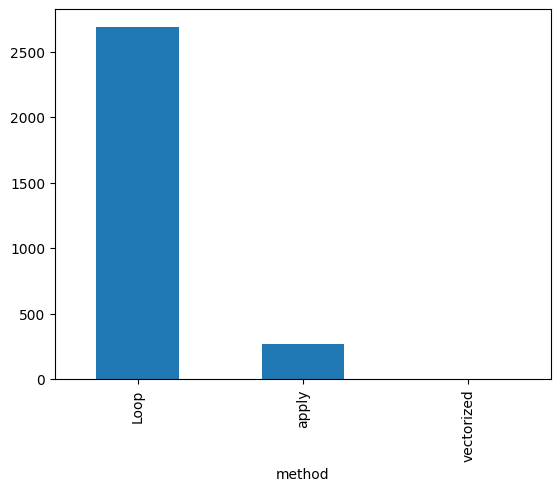

In [119]:
results = pd.DataFrame(
    [
        ["Loop", 2690 ],
        ["apply", 268],
        ['vectorized', 2.32]
        
    ],
    columns = ['method', 'run_time']

)

results.set_index('method')['run_time'].plot(kind='bar')

### Pandas functions

1. df.iloc

Pandas’ .iloc() function is used to select rows and columns by their integer-based index in a DataFrame. It is used to select rows and columns by their integer-based location.

In [120]:
df.loc[0]

age                      53
time_in_bed               1
pct_sleeping           9564
favorite_food        burger
hate_food        vegetables
reward           vegetables
Name: 0, dtype: object

In [121]:
df.loc[:2]

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,53,1,9564,burger,vegetables,vegetables
1,56,4,9564,burger,vegetables,vegetables
2,74,4,9564,pizza,vegetables,vegetables


In [123]:
df.iloc[54:60,0]

54    80
55    14
56    60
57    81
58    61
59     0
Name: age, dtype: int64

In [124]:
df.iloc[54:60,:2]

,age,time_in_bed
54,80,3
55,14,7
56,60,3
57,81,2
58,61,1
59,0,0


2. df.loc():
   
Pandas’ .loc() function is used to select rows and columns by their label-based index in a DataFrame. It is used to select rows and columns by their label-based location.

In [126]:
df.loc[:,'age']

0       53
1       56
2       74
3       19
4       36
        ..
9995    94
9996    31
9997    73
9998    39
9999    94
Name: age, Length: 10000, dtype: int64

In [128]:
df.loc[:,['age','time_in_bed','hate_food']]

,age,time_in_bed,hate_food
0,53,1,vegetables
1,56,4,vegetables
2,74,4,vegetables
3,19,2,vegetables
4,36,6,vegetables
...,...,...,...
9995,94,7,vegetables
9996,31,4,vegetables
9997,73,7,vegetables
9998,39,8,vegetables


3. df.assign()

Pandas’ .assign() function is used to add new columns to a DataFrame, based on the computation of existing columns. It allows you to add new columns to a DataFrame without modifying the original dataframe. The function returns a new DataFrame with the added columns.

In [130]:
df_new=df.assign(count_df_5=df['time_in_bed']+5)
df_new.head(5)

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward,count_df_5
0,53,1,9564,burger,vegetables,vegetables,6
1,56,4,9564,burger,vegetables,vegetables,9
2,74,4,9564,pizza,vegetables,vegetables,9
3,19,2,9564,burger,vegetables,vegetables,7
4,36,6,9564,burger,vegetables,burger,11


4. df.query()

Pandas’ .query() function allows you to filter a DataFrame based on a Boolean expression. It allows you to select rows from a DataFrame using a query string similar to SQL. The function returns a new DataFrame containing only the rows that satisfy the Boolean expression.

In [135]:
df_query=df.query('time_in_bed>5 and favorite_food=="burger" ')

In [136]:
df_query.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
4,36,6,9564,burger,vegetables,burger
19,88,6,9564,burger,vegetables,burger
35,84,8,9564,burger,vegetables,burger
42,29,8,9564,burger,vegetables,burger
43,89,8,9564,burger,vegetables,burger


It’s important to note that the original DataFrame df remains unchanged and the new DataFrame df_query is returned with the filtered rows.

5. df.sort_values()+

Pandas’ .sort_values() function allows you to sort a DataFrame by one or multiple columns. It sorts the DataFrame based on the values of one or more columns, in ascending or descending order. The function returns a new DataFrame sorted by the specified column(s).

In [138]:
df.sort_values(by='time_in_bed')

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
2482,15,0,9564,pizza,vegetables,vegetables
3055,51,0,9564,pizza,vegetables,vegetables
3057,69,0,9564,pizza,vegetables,vegetables
1065,15,0,9564,pizza,vegetables,vegetables
6926,74,0,9564,ice-cream,vegetables,vegetables
...,...,...,...,...,...,...
6672,26,8,9564,burger,vegetables,burger
9032,22,8,9564,burger,vegetables,burger
7940,13,8,9564,ice-cream,vegetables,ice-cream
5747,30,8,9564,ice-cream,vegetables,ice-cream


In [143]:
df.sort_values('time_in_bed',ascending=True)

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
2482,15,0,9564,pizza,vegetables,vegetables
3055,51,0,9564,pizza,vegetables,vegetables
3057,69,0,9564,pizza,vegetables,vegetables
1065,15,0,9564,pizza,vegetables,vegetables
6926,74,0,9564,ice-cream,vegetables,vegetables
...,...,...,...,...,...,...
6672,26,8,9564,burger,vegetables,burger
9032,22,8,9564,burger,vegetables,burger
7940,13,8,9564,ice-cream,vegetables,ice-cream
5747,30,8,9564,ice-cream,vegetables,ice-cream


In [142]:
df.sort_values(by=['time_in_bed', 'favorite_food'])

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
21,93,0,9564,burger,vegetables,burger
26,39,0,9564,burger,vegetables,vegetables
110,25,0,9564,burger,vegetables,vegetables
181,94,0,9564,burger,vegetables,burger
214,37,0,9564,burger,vegetables,vegetables
...,...,...,...,...,...,...
9706,72,8,9564,rice,vegetables,rice
9843,68,8,9564,rice,vegetables,rice
9872,67,8,9564,rice,vegetables,rice
9921,92,8,9564,rice,vegetables,rice


6. df.sample()

Pandas’ .sample() function allows you to randomly select rows from a DataFrame. It returns a new DataFrame containing the randomly selected rows. The function takes several parameters that allow you to control the sampling process, such as the number of rows to return, and whether or not to sample with replacement and seed for reproducibility.



In [144]:
# Sample 2 rows without replacement
df_sample = df.sample(n=2, replace=False, random_state=1) ## replace= False --> no replacement
df_sample

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
9953,15,6,9564,ice-cream,vegetables,ice-cream
3850,50,3,9564,ice-cream,vegetables,vegetables


In [145]:
df.sample(n=2,replace=False,random_state=1,axis=1)

,pct_sleeping,time_in_bed
0,9564,1
1,9564,4
2,9564,4
3,9564,2
4,9564,6
...,...,...
9995,9564,7
9996,9564,4
9997,9564,7
9998,9564,8


7. df.isnull()

The isnull() method in Pandas returns a DataFrame of the same shape as the original DataFrame, but with True or False values indicating whether each value in the original DataFrame is missing or not. Missing values, such as NaN or None, will be True in the resulting DataFrame, while non-missing values will be False.

In [146]:
df.isnull()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [147]:
df.isnull()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


8. df.fillna()

The fillna() method in Pandas is used to fill in missing values in a DataFrame with a specified value or method. By default, it replaces missing values with NaN, but you can specify a different value to use instead as shown below:
- value: Specifies the value to use to fill in the missing values. Can be a scalar value or a dict of values for different columns.
- method: Specifies the method to use for filling in missing values. Can be 'ffill' (forward-fill) or 'bfill' (backward-fill) or 'interpolate'(interpolate - values) or 'pad' or 'backfill'
- axis: Specifies the axis along which to fill in missing values. It can be 0 (rows) or 1 (columns).
- inplace: Whether to fill in the missing values in place (modifying the original DataFrame) or to return a new DataFrame with the missing values filled in.
- limit: Specifies the maximum number of consecutive missing values to fill.
- downcast: Specifies a dictionary of values to use to downcast the data types of columns.

In [148]:
df.fillna(0)

# forward-fill missing values (propagates last valid observation forward to next)
df.fillna(method='ffill')

# backward-fill missing values (propagates next valid observation backward to last)
df.fillna(method='bfill')

# fill missing values using interpolation
df.interpolate()

/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_85517/1233849633.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')
/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_85517/1233849633.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')
/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_85517/1233849633.py:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,53,1,9564,burger,vegetables,vegetables
1,56,4,9564,burger,vegetables,vegetables
2,74,4,9564,pizza,vegetables,vegetables
3,19,2,9564,burger,vegetables,vegetables
4,36,6,9564,burger,vegetables,burger
...,...,...,...,...,...,...
9995,94,7,9564,ice-cream,vegetables,ice-cream
9996,31,4,9564,pizza,vegetables,vegetables
9997,73,7,9564,rice,vegetables,rice
9998,39,8,9564,ice-cream,vegetables,ice-cream


It is important to note that the fillna() method returns a new DataFrame with the missing values filled in and does not modify the original DataFrame in place. If you want to modify the original DataFrame, you can use the inplace parameter and set it to True.

In [ ]:
# fill missing values in place
df.fillna(0, inplace=True)

9. df.dropna()

df.dropna() is a method used in the Pandas library to remove missing or null values from a DataFrame. It removes rows or columns from the DataFrame where at least one element is missing. 

In [149]:
df.dropna()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,53,1,9564,burger,vegetables,vegetables
1,56,4,9564,burger,vegetables,vegetables
2,74,4,9564,pizza,vegetables,vegetables
3,19,2,9564,burger,vegetables,vegetables
4,36,6,9564,burger,vegetables,burger
...,...,...,...,...,...,...
9995,94,7,9564,ice-cream,vegetables,ice-cream
9996,31,4,9564,pizza,vegetables,vegetables
9997,73,7,9564,rice,vegetables,rice
9998,39,8,9564,ice-cream,vegetables,ice-cream


If you want to remove only the columns that contain at least one missing value you can use df.dropna(axis=1)

In [150]:
df.dropna(axis=1)

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,53,1,9564,burger,vegetables,vegetables
1,56,4,9564,burger,vegetables,vegetables
2,74,4,9564,pizza,vegetables,vegetables
3,19,2,9564,burger,vegetables,vegetables
4,36,6,9564,burger,vegetables,burger
...,...,...,...,...,...,...
9995,94,7,9564,ice-cream,vegetables,ice-cream
9996,31,4,9564,pizza,vegetables,vegetables
9997,73,7,9564,rice,vegetables,rice
9998,39,8,9564,ice-cream,vegetables,ice-cream


You can also set thresh parameter to keep only the rows/columns that have at least thresh non-NA/null values.

In [151]:
df_drop_na = df.dropna(thresh=2)

10. df.drop()

df.drop() is a method used in the Pandas library to remove rows or columns from a DataFrame by specifying the corresponding labels. It can be used to drop one or multiple rows or columns based on their labels.

You can remove a specific row by calling df.drop() and passing the index label of the row you want to remove, and the axis parameter set to 0 (default is 0)

In [152]:
## remove first row of na
df_drop = df.drop(0)

In [153]:
df_drop = df.drop([0,1]) ## drop multiple rows by passsing their indexes

In [155]:
# drop columns by passing the labels of the columns you want to remove and setting the axis parameter to 1:
df_drop = df.drop(['time_in_bed', 'favorite_food'], axis=1)
df_drop

,age,pct_sleeping,hate_food,reward
0,53,9564,vegetables,vegetables
1,56,9564,vegetables,vegetables
2,74,9564,vegetables,vegetables
3,19,9564,vegetables,vegetables
4,36,9564,vegetables,burger
...,...,...,...,...
9995,94,9564,vegetables,ice-cream
9996,31,9564,vegetables,vegetables
9997,73,9564,vegetables,rice
9998,39,9564,vegetables,ice-cream


11. df.pivot_table()
    
pd.pivot_table() is a method in the Pandas library that is used to create a pivot table from a DataFrame. A pivot table is a table that summarizes and aggregates data in a more meaningful and organized way, by creating a new table with one or more columns as the index, one or more columns as values, and one or more columns as attributes.

In the example below we will create a pivot table with Ethnicity as the index and aggregate the sum of the count. This is used to know the count of each Ethnicity in the dataset.

In [156]:
pd.pivot_table(df,index='favorite_food',values='time_in_bed',aggfunc='sum')

,time_in_bed
favorite_food,
burger,9948
ice-cream,9976
pizza,10214
rice,9994


In [163]:
pd.pivot_table(df,index=['hate_food','favorite_food'],values='time_in_bed',aggfunc='sum')

time_in_bed
hate_food  favorite_food             
vegetables burger               10205
           ice-cream            10171
           pizza                 9865
           rice                  9973

In [165]:
pd.pivot_table(df,index=['hate_food','favorite_food'],values='time_in_bed',aggfunc=['sum','count'])

sum       count
                         time_in_bed time_in_bed
hate_food  favorite_food                        
vegetables burger              10205        2532
           ice-cream           10171        2554
           pizza                9865        2446
           rice                 9973        2468

12. df.groupby()

df.groupby() is a method in the Pandas library that is used to group rows of a DataFrame based on one or multiple columns. This allows you to perform aggregate operations on the groups, such as calculating the mean, sum, or count of the values in each group.

In [169]:
grouped = df.groupby('time_in_bed')
# Print the mean of each group
print(grouped.count())

              age  pct_sleeping  favorite_food  hate_food
time_in_bed                                              
0            1080          1080           1080       1080
1            1155          1155           1155       1155
2            1088          1088           1088       1088
3            1061          1061           1061       1061
4            1135          1135           1135       1135
5            1094          1094           1094       1094
6            1163          1163           1163       1163
7            1080          1080           1080       1080
8            1144          1144           1144       1144


In [170]:
df.shape

(10000, 5)

In [172]:
grouped.sum()

,age,pct_sleeping,favorite_food,hate_food
time_in_bed,,,,
0,53371,10444680,burgerpizzapizzaricepizzaburgerice-creamice-cr...,vegetablesvegetablesvegetablesvegetablesvegeta...
1,57848,11170005,riceburgerice-creamburgerpizzaricepizzapizzabu...,vegetablesvegetablesvegetablesvegetablesvegeta...
2,55345,10522048,pizzaice-creamburgerburgerburgerburgerpizzaric...,vegetablesvegetablesvegetablesvegetablesvegeta...
3,50605,10260931,ice-creampizzaburgerice-creamice-creamriceburg...,vegetablesvegetablesvegetablesvegetablesvegeta...
4,54900,10976585,burgerpizzariceburgerburgerburgerpizzaice-crea...,vegetablesvegetablesvegetablesvegetablesvegeta...
5,55167,10580074,ice-creampizzaice-creamburgerice-creamricerice...,vegetablesvegetablesvegetablesvegetablesvegeta...
6,57382,11247373,ricericeice-creamice-creampizzapizzariceice-cr...,vegetablesvegetablesvegetablesvegetablesvegeta...
7,53544,10444680,pizzapizzapizzaricericericepizzaice-creamricer...,vegetablesvegetablesvegetablesvegetablesvegeta...
8,56437,11063624,pizzaricepizzaricepizzaburgerice-creamriceburg...,vegetablesvegetablesvegetablesvegetablesvegeta...


13. df.transpose

df.transpose() is a method in the Pandas library used to transpose the rows and columns of a DataFrame? This means that the rows become columns and the columns become rows.

In [173]:
# Transpose the DataFrame
df_transposed = df.transpose()

# Print the transposed DataFrame
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
age,87,46,63,53,36,19,28,22,11,83,...,27,8,26,36,83,12,82,34,14,69
time_in_bed,6,7,4,0,4,1,2,8,7,3,...,4,5,6,2,3,3,4,7,1,3
pct_sleeping,9671,9671,9671,9671,9671,9671,9671,9671,9671,9671,...,9671,9671,9671,9671,9671,9671,9671,9671,9671,9671
favorite_food,rice,pizza,burger,burger,pizza,rice,pizza,pizza,pizza,ice-cream,...,rice,burger,burger,ice-cream,pizza,rice,rice,ice-cream,pizza,ice-cream
hate_food,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,...,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables


In [174]:
df_transposed = df.T
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
age,87,46,63,53,36,19,28,22,11,83,...,27,8,26,36,83,12,82,34,14,69
time_in_bed,6,7,4,0,4,1,2,8,7,3,...,4,5,6,2,3,3,4,7,1,3
pct_sleeping,9671,9671,9671,9671,9671,9671,9671,9671,9671,9671,...,9671,9671,9671,9671,9671,9671,9671,9671,9671,9671
favorite_food,rice,pizza,burger,burger,pizza,rice,pizza,pizza,pizza,ice-cream,...,rice,burger,burger,ice-cream,pizza,rice,rice,ice-cream,pizza,ice-cream
hate_food,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,...,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables


14. df.merge()

df.merge() is a pandas function that allows you to combine two DataFrames based on one or more common columns. It is similar to SQL JOINs. The function returns a new DataFrame that contains only the rows where the values in the specified columns match between the two DataFrames.


In [175]:
# Create the first DataFrame
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                   'value': [1, 2, 3, 4]})

# Create the second DataFrame
df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                   'value': [5, 6, 7, 8]})

# Merge the two DataFrames on the 'key' column
merged_df = df1.merge(df2, on='key')

# Print the merged DataFrame
print(merged_df)

  key  value_x  value_y
0   B        2        5
1   D        4        6


15. def.rename()

df.rename() is a pandas function that allows you to change the name of one or more columns or rows in a DataFrame. You can use the columns parameter to change the column names, and the index parameter to change the row names.

In [176]:
df_rename = df.rename(columns={'favorite_food': 'favorite', 'hate_food':'hate'})
df_rename.head()

,age,time_in_bed,pct_sleeping,favorite,hate
0,87,6,9671,rice,vegetables
1,46,7,9671,pizza,vegetables
2,63,4,9671,burger,vegetables
3,53,0,9671,burger,vegetables
4,36,4,9671,pizza,vegetables


In [177]:
df_rename = df.rename(index={3:'Favorite',4:'Hate'}) ## renmae index
df_rename.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,87,6,9671,rice,vegetables
1,46,7,9671,pizza,vegetables
2,63,4,9671,burger,vegetables
Favorite,53,0,9671,burger,vegetables
Hate,36,4,9671,pizza,vegetables


## **Top 10 pandas mistake to avoid:**

1. Having Column Names with Spaces ( you xcan't access df.Sales Amount. Instead, you have to access df['Sales Amount']
2. Not Using Query Method for Filtering 

In [181]:
df.query('time_in_bed>7')

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
7,22,8,9671,pizza,vegetables
11,18,8,9671,rice,vegetables
33,13,8,9671,pizza,vegetables
34,50,8,9671,rice,vegetables
37,46,8,9671,pizza,vegetables
...,...,...,...,...,...
9959,87,8,9671,ice-cream,vegetables
9982,52,8,9671,ice-cream,vegetables
9983,1,8,9671,burger,vegetables
9986,79,8,9671,rice,vegetables


3. Not using @ Symbol when writing complex code:

In [182]:
df.head(3)

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,87,6,9671,rice,vegetables
1,46,7,9671,pizza,vegetables
2,63,4,9671,burger,vegetables


In [183]:
favorite_food='pizza'
hate_food='vegetables'
df.query('favorite_food==@favorite_food and hate_food==@hate_food')

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
1,46,7,9671,pizza,vegetables
4,36,4,9671,pizza,vegetables
6,28,2,9671,pizza,vegetables
7,22,8,9671,pizza,vegetables
8,11,7,9671,pizza,vegetables
...,...,...,...,...,...
9942,49,6,9671,pizza,vegetables
9964,75,6,9671,pizza,vegetables
9984,26,2,9671,pizza,vegetables
9994,83,3,9671,pizza,vegetables


4. Iteration over dataframe instead of using vectorization:

In [184]:
for index,row in df.iterrows():
    df.loc[index,'z']=row['time_in_bed']*row['pct_sleeping']

In [185]:
df.head(3)

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,z
0,87,6,9671,rice,vegetables,58026.0
1,46,7,9671,pizza,vegetables,67697.0
2,63,4,9671,burger,vegetables,38684.0


In [187]:
## Instead use vectorization
df['z_1']=df['time_in_bed']*df['pct_sleeping']
df.head(3)

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,z,z_1
0,87,6,9671,rice,vegetables,58026.0,58026
1,46,7,9671,pizza,vegetables,67697.0,67697
2,63,4,9671,burger,vegetables,38684.0,38684


5. Treating slices of dtaaframe as new dataframe (Use copy to not cause a change to the prigional dataframe).
6. Not using chain commands for multiple transformations

In [190]:
import pandas as pd

# Create a sample DataFrame
data = {'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
    'age': [25, 32, 18, 47, 29],
    'gender': ['F', 'M', 'M', 'M', 'F']}
df = pd.DataFrame(data)
new_df=df.loc[df['age']>23,['name','gender']].copy().assign(age_plus_5=df.age+5)
new_df

,name,gender,age_plus_5
0,Alice,F,30
1,Bob,M,37
3,David,M,52
4,Emily,F,34


7. Not setting column dtypes correctly:
   
Set column dtype correctly because of the following reasons:
- Memory Usage: set ciorrect dtype reduce the memory usage. This is especially important when working with large datasets, as it can help avoid running out of memory and crashing your program.
- Data Consistency: Setting column dtypes can help ensure that your data is consistent and accurate.
- Performance:  Pandas operations can be much faster when the dtypes are set correctly. For example, operations like sorting and filtering can be optimized when Pandas knows the data types of the columns being operated on.

8. Not using pandas builtin plotting functions: 

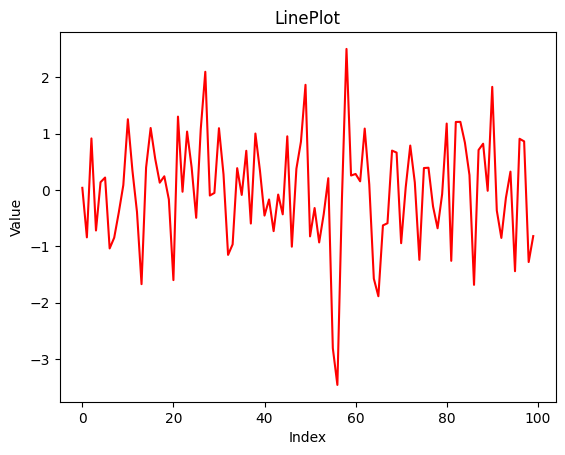

In [191]:
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))

df['A'].plot(kind='line',color='red',title='LinePlot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

<Axes: title={'center': 'Scatter Plot'}, xlabel='A', ylabel='B'>

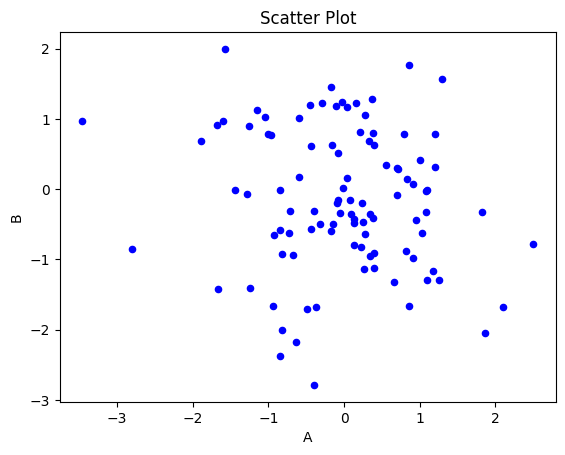

In [192]:
df.plot(kind='scatter', x='A', y='B', color='blue', title='Scatter Plot')

<Axes: title={'center': 'Bar Plot'}>

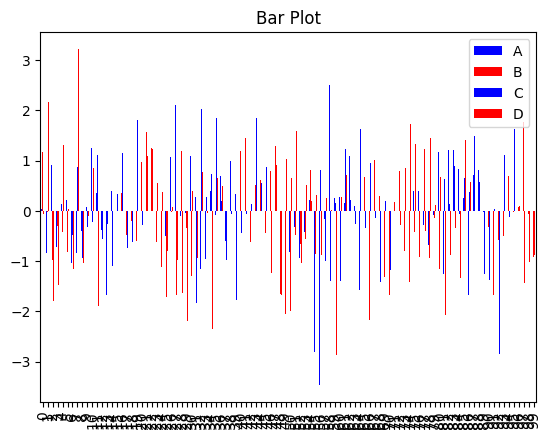

In [193]:
df.plot(kind='bar', color=['blue', 'red'], title='Bar Plot')

<Axes: title={'center': 'Histogram'}, ylabel='Frequency'>

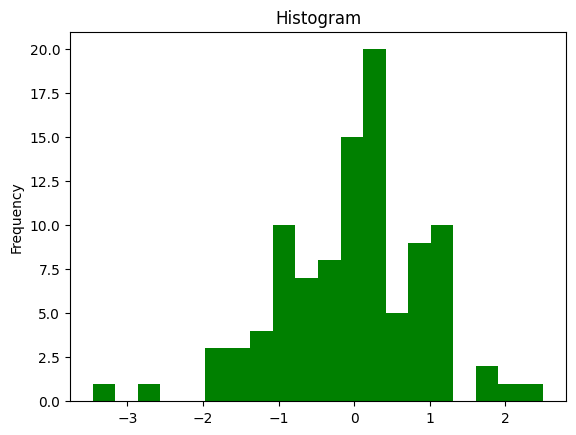

In [194]:
df['A'].plot(kind='hist', bins=20, color='green', title='Histogram')

9. Aggregating manually instead of .groupby()

In [197]:
df.groupby('favorite_food')['time_in_bed'].agg(['sum','mean','max','min'])

,sum,mean,max,min
favorite_food,,,,
burger,9750,3.977968,8,0
ice-cream,9841,3.936400,8,0
pizza,10321,4.121805,8,0
rice,10129,3.979961,8,0


10. Manually aggregating by creating multiple pivot tables:

In [ ]:
import pandas as pd

df = pd.read_csv('sales_data.csv')

region_sales = pd.pivot_table(df, index='region', values='sales', aggfunc=['sum', 'mean', 'max', 'min'])
category_sales = pd.pivot_table(df, index='category', values='sales', aggfunc=['sum', 'mean', 'max', 'min'])
product_sales = pd.pivot_table(df, index='product', values='sales', aggfunc=['sum', 'mean', 'max', 'min'])

print(region_sales)
print(category_sales)
print(product_sales)

This code creates multiple pivot tables to calculate the total, average, maximum, and minimum sales for each region, category, and product. This can be simplified using .groupby():

In [ ]:
import pandas as pd

df = pd.read_csv('sales_data.csv')

sales_stats = df.groupby(['region', 'category', 'product'])['sales'].agg(['sum', 'mean', 'max', 'min'])
print(sales_stats)

11. Saving Large Datasets as CSV File

- CSV files can be very large in size which  cause problems with storage and processing, especially if you have limited resources.
- Limited data types: CSV files only support a limited range of data types, such as text, numbers, and dates. If your dataset includes more complex data types, such as images or JSON objects, then CSV may not be the best format to use.
- Loss of metadata: CSV files do not support metadata, such as data types, column names, or null values. This can cause problems when importing or exporting the data, and can make it difficult to perform data analysis.
- Performance Issue: Reading and writing large CSV files can be slow and can put a strain on system resources, especially when dealing with complex datasets.
- No data validation:  CSV files do not provide any built-in data validation or error checking, which can lead to data inconsistencies and errors.

#### There are more efficient ways to save large dataframes than using CSV files. Some of the options are:
- Parquet: Parquet is a columnar storage format that is optimized for data processing on large data sets. It can handle complex data types and supports compression, which makes it a good choice for storing large dataframes.
- Feather: Feather is a lightweight binary file format designed for fast read and write operations. It supports both R and Python and can be used to store dataframes in a compact and efficient way.
- HDF5: HDF5 is a file format designed for storing large numerical data sets. It provides a hierarchical structure that can be used to organize data and supports compression and chunking, which makes it suitable for storing large dataframes.
- Apache Arrow: Apache Arrow is a cross-language development platform for in-memory data processing. It provides a standardized format for representing data that can be used across different programming languages and supports zero-copy data sharing, which makes it efficient for storing and processing large dataframes.